# 分析流程摘要

來源 : https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/
目標 : 透過溫度, 降雨量, 植披等24個特徵值來預測疾病的發病數

分析步驟 : 
* Step1_載入基本套件並入資料
* Step2_觀察平台所提供的各個資料樣態
* Step3_檢查缺失值以及缺失值處理(ffill,bfill,mean,median)
* 將數據以城市區分，拆解成兩個資料集
* 其兩個資料集在將total_case往後順延10天
* Step4_特徵值正規化並用PCA降維
* Setp5_用各種模型訓練(邏輯司回歸, 決策樹, 隨機森林, SVM)
* Step6_用模型挑選最佳特徵值
* Step7_重新用模型訓練(邏輯司回歸, 決策樹, 隨機森林, SVM)
* Step8_讀入提交用資料集，處理缺失值，並將資料型態調整成符合model的格式
* Step9_以邏輯思回歸與隨機森林兩種模型預測結果並提交


In [192]:
#載入基本套件
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats

In [193]:
#load data
dengue_features_train = pd.read_csv("C:\\Users\\user\\Desktop\\python workspace\\drivendata\\dengue_features_train.csv")
dengue_features_test =  pd.read_csv("C:\\Users\\user\\Desktop\\python workspace\\drivendata\\dengue_features_test.csv")
dengue_labels_train = pd.read_csv("C:\\Users\\user\\Desktop\\python workspace\\drivendata\\dengue_labels_train.csv")

In [194]:
#see the shape of training feature
dengue_features_train.shape

(1456, 24)

In [195]:
#看feature資料的大致上資訊
dengue_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [196]:
#see the first 5 rows of training feature
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [197]:
#see the shape of test feature
dengue_features_test.shape

(416, 24)

In [198]:
#觀察測試用feature的資訊
dengue_features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [199]:
#see the first 5 rows of test feature
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [200]:
#see the shape of label
dengue_labels_train.shape

(1456, 4)

In [201]:
#觀察訓練用label的資訊
dengue_labels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [202]:
#see the first 5 rows of test feature
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [203]:
#merge features and labels of training data
df = pd.merge(dengue_features_train, dengue_labels_train, how='outer', on=dengue_labels_train.columns.tolist()[:-1])
df.head(15)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [204]:
df.shape

(1456, 25)

In [205]:
#see Nan
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [206]:
#將所有遺漏值以前一個數值填入
for i in df.columns[4:24]:
    v = df[i].median()
    df[i] = df[i].fillna(value = v)

In [207]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [208]:
#以城市為分類，將合併的資料集分成兩個資料集sj_df和iq_df
sj_df = df.loc[df["city"]=='sj']
print("sj_df.shape:{}".format(sj_df.shape))

iq_df = df.loc[df["city"]=='iq']
print("iq_df.shape:{}".format(iq_df.shape))

sj_df.shape:(936, 25)
iq_df.shape:(520, 25)


In [209]:
#獨立取出sj的label
sj_label = dengue_labels_train.loc[dengue_labels_train['city']=='sj']
print("sj_label.shape:{}".format(sj_label.shape))
sj_label.head(15)

sj_label.shape:(936, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

X = sj_df[["reanalysis_specific_humidity_g_per_kg","reanalysis_dew_point_temp_k","station_avg_temp_c"]].values
y = sj_df['total_cases'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)
#以MAE評估模型效能
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Mean absolute error: 25.74
Variance score: -0.19
Accuracy score:0.07


In [69]:
#用xgboost訓練模型
import xgboost as xgb
from xgboost import plot_importance


# 训练模型
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=160, silent=0, objective='multi:softmax')
model.fit(X_train, y_train)

# 对测试集进行预测
y_pred = model.predict(X_test)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Accuracy score:0.03


結論 :把所有feature丟進去xgboost訓練的成效似乎不太好

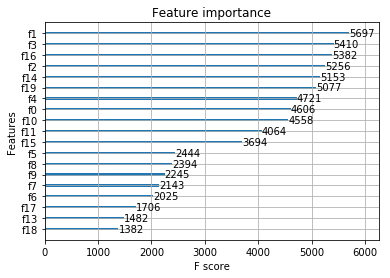

In [70]:
plot_importance(model)
plt.show() 

In [214]:
#觀察sj_df各特徵值的相關係數
sj_df_corr = sj_df.corr()
sj_df_corr

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.073143,-0.344197,-0.491354,-0.019299,-0.083075,0.031135,0.185343,0.189146,0.015241,...,-0.285348,0.031135,0.017932,0.323638,-0.097122,-0.276055,-0.172423,-0.001983,0.082718,-0.212690
weekofyear,-0.073143,1.000000,-0.011284,-0.006485,-0.001433,-0.064110,0.228900,0.569413,0.555582,0.572348,...,0.303661,0.228900,0.579424,-0.097834,0.480285,-0.135448,0.322250,0.514930,0.211247,0.287134
ndvi_ne,-0.344197,-0.011284,1.000000,0.594150,0.215574,0.161641,-0.049136,-0.076064,-0.075649,-0.046449,...,0.030554,-0.049136,-0.042650,-0.021529,0.039968,0.115078,0.069952,0.005766,-0.059436,0.066347
ndvi_nw,-0.491354,-0.006485,0.594150,1.000000,0.191592,0.213581,-0.030074,-0.074281,-0.073334,-0.023731,...,0.076253,-0.030074,-0.018521,-0.054522,0.089830,0.180143,0.138706,0.020705,-0.067417,0.098656
ndvi_se,-0.019299,-0.001433,0.215574,0.191592,1.000000,0.821764,-0.119458,-0.014882,-0.011859,-0.061450,...,-0.110999,-0.119458,-0.057247,0.027170,-0.054107,0.021122,-0.059039,-0.068075,-0.139172,0.028092
ndvi_sw,-0.083075,-0.064110,0.161641,0.213581,0.821764,1.000000,-0.118976,-0.043218,-0.035810,-0.086311,...,-0.115264,-0.118976,-0.079546,0.048669,-0.038797,0.072463,-0.013392,-0.072225,-0.173527,0.035350
precipitation_amt_mm,0.031135,0.228900,-0.049136,-0.030074,-0.119458,-0.118976,1.000000,0.232839,0.221646,0.401931,...,0.500316,1.000000,0.409145,-0.093530,0.195797,-0.157913,0.193353,0.223851,0.565376,0.060258
reanalysis_air_temp_k,0.185343,0.569413,-0.076064,-0.074281,-0.014882,-0.043218,0.232839,1.000000,0.996908,0.901541,...,0.297349,0.232839,0.903052,0.172870,0.879430,0.037576,0.694622,0.832921,0.113928,0.181172
reanalysis_avg_temp_k,0.189146,0.555582,-0.075649,-0.073334,-0.011859,-0.035810,0.221646,0.996908,1.000000,0.894816,...,0.284973,0.221646,0.895863,0.197935,0.878913,0.053937,0.702276,0.826906,0.097839,0.175113
reanalysis_dew_point_temp_k,0.015241,0.572348,-0.046449,-0.023731,-0.061450,-0.086311,0.401931,0.901541,0.894816,1.000000,...,0.679660,0.401931,0.998533,-0.034417,0.869005,-0.055210,0.689999,0.849075,0.284949,0.203887


In [215]:
#將特徵值依重要性排序
sj_df_corr['total_cases'].sort_values(ascending = False)

total_cases                              1.000000
weekofyear                               0.287134
reanalysis_specific_humidity_g_per_kg    0.208058
reanalysis_dew_point_temp_k              0.203887
station_avg_temp_c                       0.196702
reanalysis_max_air_temp_k                0.194848
station_max_temp_c                       0.190209
reanalysis_min_air_temp_k                0.186374
reanalysis_air_temp_k                    0.181172
station_min_temp_c                       0.176505
reanalysis_avg_temp_k                    0.175113
reanalysis_relative_humidity_percent     0.144363
reanalysis_precip_amt_kg_per_m2          0.107251
ndvi_nw                                  0.098656
ndvi_ne                                  0.066347
reanalysis_sat_precip_amt_mm             0.060258
precipitation_amt_mm                     0.060258
station_precip_mm                        0.051596
ndvi_sw                                  0.035350
station_diur_temp_rng_c                  0.035280


依上述結果顯示，不含weekofyear，前五項與total_cases關聯性高的feature為
* reanalysis_specific_humidity_g_per_kg    
* reanalysis_dew_point_temp_k              
* station_avg_temp_c                       
* reanalysis_max_air_temp_k                
* station_max_temp_c

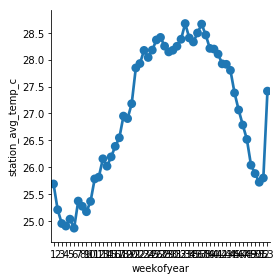

In [216]:
sns.factorplot(data = sj_df, x="weekofyear", y="station_avg_temp_c", ci = None)

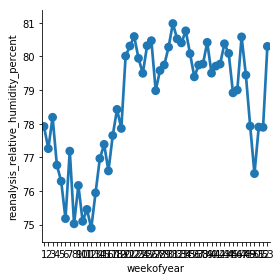

In [217]:
sns.factorplot(data = sj_df, x="weekofyear", y="reanalysis_relative_humidity_percent", ci = None)

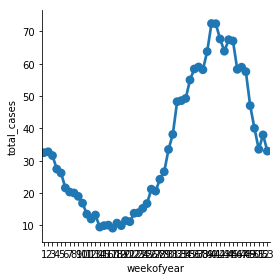

In [218]:
sns.factorplot(data = sj_df, x="weekofyear", y="total_cases", ci = None)

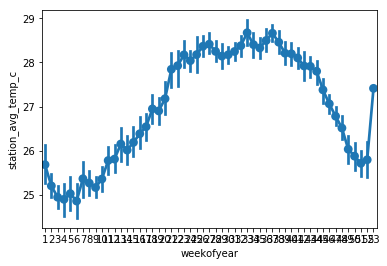

In [219]:
sns.pointplot(sj_df['weekofyear'],sj_df['station_avg_temp_c'],xlim=(1,100),ylim=(0, 50),size = 3)

Text(0,0.5,'total_cases')

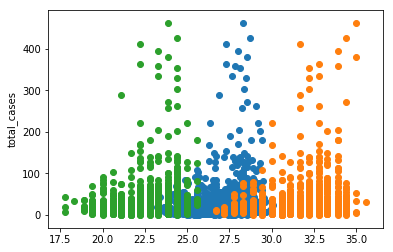

In [220]:
#隨機挑一個與label關聯性的feature:'station_avg_temp_c'，繪製散佈圖。
plt.scatter(sj_df['station_avg_temp_c'],sj_df['total_cases'])
plt.scatter(sj_df['station_max_temp_c'],sj_df['total_cases'])
plt.scatter(sj_df['station_min_temp_c'],sj_df['total_cases'])

plt.ylabel('total_cases')

In [221]:
#取關聯性高的feature
sj_df_new = sj_df[["station_avg_temp_c","station_max_temp_c","station_min_temp_c","total_cases"]]
sj_df_new.index = range(len(sj_df_new))
print(sj_df_new.shape)

(936, 4)


In [289]:
#用關聯性高的feature訓練model : "station_avg_temp_c","station_max_temp_c","station_min_temp_c"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

X = sj_df[["station_avg_temp_c","station_max_temp_c","station_min_temp_c"]].values
y = sj_df['total_cases'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

svm2 = SVC(kernel='linear', probability=True)
svm2.fit(X_train_std,y_train)
y_pred = svm2.predict(X_test_std)
#以MAE評估模型效能
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Mean absolute error: 25.72
Variance score: -0.20
Accuracy score:0.07


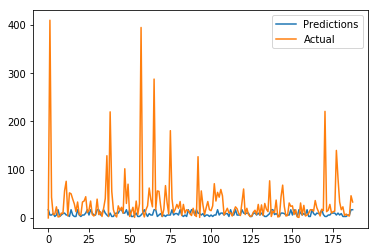

In [232]:
plt.plot(y_pred, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

In [233]:
#貝式模型_高斯模型
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_pca)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Accuracy score:0.07
Mean absolute error: 26.24


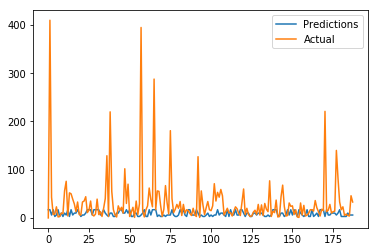

In [234]:
plt.plot(y_pred, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

In [157]:
# 训练模型xgboost
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=160, silent=0, objective='multi:softmax')
model.fit(X_train_pca, y_train)

# 对测试集进行预测
y_pred = model.predict(X_test_pca)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Accuracy score:0.01


In [242]:
#用隨機森林預測
forest = RandomForestClassifier(criterion = 'entropy',n_estimators=150, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Accuracy score:0.02
Mean absolute error: 38.90


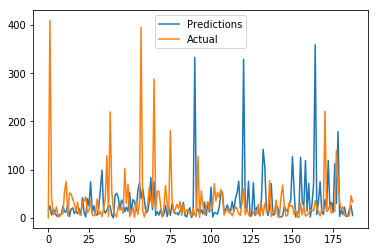

In [236]:
plt.plot(y_pred, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

In [243]:
#刪掉前十項label_sample
sj_label = sj_df[['total_cases']]
sj_label.head(5)
sj_label = sj_label.drop(sj_label.index[:10])
sj_label.index = range(len(sj_label))

#刪掉後十項feature_sample
sj_df_feature = sj_df[["station_avg_temp_c","station_max_temp_c","station_min_temp_c"]]
sj_df_feature = sj_df_feature.drop(sj_df_feature.index[926:])
sj_df_feature.index = range(len(sj_df_feature))

#合併sj的feature和label
sj_data = pd.concat([sj_df_feature, sj_label], axis=1)
sj_data.head(5)

,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
0,25.442857,29.4,20.0,8
1,26.714286,31.7,22.2,2
2,26.714286,32.2,22.8,6
3,27.471429,33.3,23.3,17
4,28.942857,35.0,23.9,23


In [244]:
sj_data_corr = sj_data.corr()
sj_data_corr = pd.DataFrame(sj_data_corr)
sj_data_corr['total_cases'].sort_values(ascending=False)

total_cases           1.000000
station_avg_temp_c    0.368286
station_min_temp_c    0.362595
station_max_temp_c    0.309414
Name: total_cases, dtype: float64

In [245]:
#將label與feature錯置10個後重新訓練

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

X = sj_data[["station_avg_temp_c","station_max_temp_c","station_min_temp_c"]].values
y = sj_data['total_cases'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

svm3 = SVC(kernel='linear', probability=True)
svm3.fit(X_train_pca,y_train)
y_pred = svm3.predict(X_test_pca)

#以MAE評估模型效能
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Mean absolute error: 18.97
Variance score: -0.06
Accuracy score:0.06


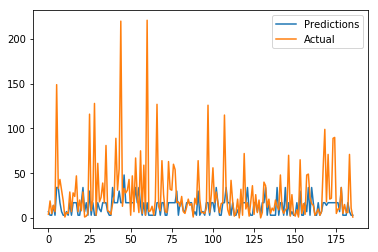

In [246]:
plt.plot(y_pred, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

In [247]:
#貝式模型_高斯模型
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train_pca,y_train)
y_pred = clf2.predict(X_test_pca)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Accuracy score:0.04
Mean absolute error: 21.56
Variance score: -0.17


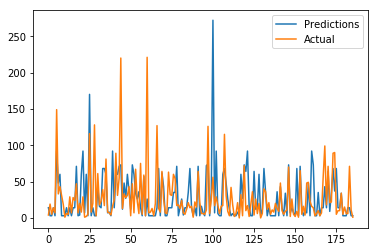

In [248]:
plt.plot(y_pred, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

結論 : 在sj_df部分，將feature和label，以10天方式錯置，模型準確率並沒有比未錯置前高。因此，以同樣的方法來對iq_df進行訓練

In [249]:
#觀察lq_df各特徵值的相關係數
iq_df_corr = iq_df.corr()
iq_df_corr

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.136842,-0.065064,0.028386,-0.072144,-0.018393,0.080811,0.026720,0.006674,0.317412,...,0.247961,0.080811,0.320352,-0.242389,0.079124,-0.106788,0.026075,0.128826,-0.035237,0.179451
weekofyear,-0.136842,1.000000,0.243216,0.211390,0.315409,0.250222,-0.114621,0.289580,0.302408,-0.099221,...,-0.283362,-0.114621,-0.089256,0.339763,0.077325,0.196090,0.195315,-0.099004,-0.040706,-0.011850
ndvi_ne,-0.065064,0.243216,1.000000,0.767777,0.767275,0.842727,-0.004141,0.146661,0.167343,-0.034004,...,-0.124057,-0.004141,-0.032029,0.189190,0.107494,0.132715,0.150102,-0.018824,0.014158,0.020544
ndvi_nw,0.028386,0.211390,0.767777,1.000000,0.645112,0.765802,-0.052819,0.147592,0.169015,-0.036705,...,-0.124945,-0.052819,-0.031562,0.185975,0.119675,0.175129,0.164148,-0.098704,-0.012971,-0.009053
ndvi_se,-0.072144,0.315409,0.767275,0.645112,1.000000,0.715526,-0.039690,0.193168,0.207744,-0.064693,...,-0.184921,-0.039690,-0.062029,0.229727,0.110534,0.154370,0.166773,-0.062301,0.011592,-0.040769
ndvi_sw,-0.018393,0.250222,0.842727,0.765802,0.715526,1.000000,-0.013711,0.158460,0.175610,-0.032287,...,-0.130880,-0.013711,-0.027848,0.187977,0.110263,0.150363,0.181592,-0.064431,-0.000021,0.033173
precipitation_amt_mm,0.080811,-0.114621,-0.004141,-0.052819,-0.039690,-0.013711,1.000000,-0.052098,-0.054851,0.470144,...,0.434845,1.000000,0.467432,-0.354236,0.104307,-0.106857,0.004091,0.300114,0.374072,0.092041
reanalysis_air_temp_k,0.026720,0.289580,0.146661,0.147592,0.193168,0.158460,-0.052098,1.000000,0.972220,0.151469,...,-0.550039,-0.052098,0.177461,0.524706,0.582447,0.448420,0.628555,0.246387,-0.133510,0.094905
reanalysis_avg_temp_k,0.006674,0.302408,0.167343,0.169015,0.207744,0.175610,-0.054851,0.972220,1.000000,0.142415,...,-0.538469,-0.054851,0.166083,0.584302,0.553040,0.459086,0.611635,0.213420,-0.134927,0.079448
reanalysis_dew_point_temp_k,0.317412,-0.099221,-0.034004,-0.036705,-0.064693,-0.032287,0.470144,0.151469,0.142415,1.000000,...,0.737421,0.470144,0.997728,-0.595423,0.313510,-0.171006,0.088076,0.617872,0.183495,0.229866


In [250]:
#將特徵值依重要性排序
iq_df_corr['total_cases'].sort_values(ascending = False)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.236267
reanalysis_dew_point_temp_k              0.229866
reanalysis_min_air_temp_k                0.205298
station_min_temp_c                       0.198314
year                                     0.179451
reanalysis_relative_humidity_percent     0.132554
reanalysis_precip_amt_kg_per_m2          0.102694
reanalysis_air_temp_k                    0.094905
station_avg_temp_c                       0.093437
reanalysis_sat_precip_amt_mm             0.092041
precipitation_amt_mm                     0.092041
reanalysis_avg_temp_k                    0.079448
station_max_temp_c                       0.060392
station_precip_mm                        0.045364
ndvi_sw                                  0.033173
ndvi_ne                                  0.020544
ndvi_nw                                 -0.009053
weekofyear                              -0.011850
ndvi_se                                 -0.040769


前四項重要特徵值為:
* reanalysis_specific_humidity_g_per_kg   
* reanalysis_dew_point_temp_k             
* reanalysis_min_air_temp_k                
* station_min_temp_c                       

In [321]:
X = iq_df[["reanalysis_specific_humidity_g_per_kg","reanalysis_dew_point_temp_k","reanalysis_min_air_temp_k"]].values
y = iq_df['total_cases'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

svm4 = SVC(kernel='linear', probability=True)
svm4.fit(X_train_pca,y_train)
y_pred = svm4.predict(X_test_pca)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))


#以MAE評估模型效能
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

# The mean absolute error
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))


clf3 = GaussianNB()
clf3.fit(X_train_std,y_train)
y_pred_clf = clf3.predict(X_test_std)
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, y_pred_clf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_clf))
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred_clf, normalize=True, sample_weight=None))

Accuracy score:0.10
Mean absolute error: 9.05
Variance score: -0.35
Accuracy score:0.10
Mean absolute error: 12.55
Variance score: -0.43
Accuracy score:0.11


In [277]:
print(y_pred_clf)

[ 0  0  0 13  0  0  0  0  6  0  6  0  0  0  0  0 13  1  0  0 23  0  0  2  0
  0 10  0  5  0  0  7  0  0  2  0  0  0  2  0  0  2 19  6  0  0  0  0  0  2
  0  0  2  0  0  0  9  0  0 13  0  1  0  0 19  6  0  0  2 13  0  0  0  0  0
  0  2  0  0  2  0  0  0  0  2  2  0  0  2  2  6  6  2  2  0 10  0  0  0  2
  0  0  0  0]


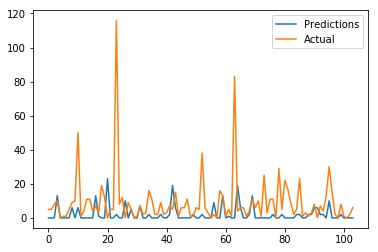

In [278]:
plt.plot(y_pred_clf, label="Predictions")
plt.plot(y_test, label="Actual")
plt.legend()

In [283]:
#用隨機森林預測
iq_forest = RandomForestClassifier(criterion = 'entropy',n_estimators=150, random_state=1, n_jobs=-1)
iq_forest.fit(X_train, y_train)
y_pred = iq_forest.predict(X_test)
print('Accuracy score:%.2f' % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

Accuracy score:0.06
Mean absolute error: 7.90


In [284]:
#load提交格式
submission_df = pd.DataFrame(dengue_features_test) #將要預測的資料轉換成dataframe的格式
submission_df.isnull().sum() #檢查是否還有遺漏值

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [285]:
#將所有遺漏值以中位數方式填入，避免極端值造成的影響
for j in submission_df.columns[4:]:
    vv = submission_df[j].median()
    submission_df[j] = submission_df[j].fillna(value = vv)

#看資料型態
print(submission_df.shape)    
    
#檢查缺失值
submission_df.isnull().sum()

(416, 24)


city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [286]:
submission_df.tail(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
406,iq,2013,17,2013-04-23,0.193314,0.247057,0.275643,0.372729,71.07,297.202857,...,58.20,96.580000,71.07,18.180000,7.200000,26.950000,9.350,33.6,21.2,74.9
407,iq,2013,18,2013-04-30,0.385143,0.369700,0.375933,0.354214,2.28,297.981429,...,2.60,77.757143,2.28,14.852857,14.285714,27.250000,13.125,35.0,18.2,8.9
408,iq,2013,19,2013-05-07,0.396343,0.292471,0.333400,0.352271,62.52,298.310000,...,52.60,92.250000,62.52,18.478571,9.671429,28.450000,9.850,34.6,22.4,7.1
409,iq,2013,20,2013-05-14,0.352557,0.281050,0.307071,0.277400,46.27,297.367143,...,105.70,95.338571,46.27,18.038571,6.400000,28.233333,9.400,34.1,21.4,38.6
410,iq,2013,21,2013-05-21,0.236829,0.293857,0.223443,0.299429,87.29,296.880000,...,124.20,94.740000,87.29,17.382857,6.700000,26.633333,8.900,32.8,21.8,97.3
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480,32.2,21.8,34.1
415,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,27.80,87.030000,51.80,16.148571,11.542857,27.350000,9.675,32.6,22.0,14.9


In [310]:
#以城市為分類，將合併的資料集分成兩個資料集sj_df和iq_df
sj_submission_df = submission_df[submission_df["city"]=='sj']
sj_submission_df_new = sj_submission_df[["reanalysis_specific_humidity_g_per_kg","reanalysis_dew_point_temp_k","station_avg_temp_c"]].values
print("sj_submission_df_new.shape:{}".format(sj_submission_df_new.shape))

iq_submission_df = submission_df[submission_df["city"]=='iq']
iq_submission_df_new = iq_submission_df[["reanalysis_specific_humidity_g_per_kg","reanalysis_dew_point_temp_k","reanalysis_min_air_temp_k"]].values
print("iq_submission_df_new.shape:{}".format(iq_submission_df_new.shape))

sj_submission_df_new.shape:(260, 3)
iq_submission_df_new.shape:(156, 3)


In [311]:
sc = StandardScaler()
sj_submission_df_new_std = sc.fit_transform(sj_submission_df_new)
sj_pred = svm2.predict(sj_submission_df_new_std)
sj_pred

array([ 3,  6,  3,  3,  3,  3,  6, 10, 10, 10,  6, 10, 10, 10,  6, 10, 10,
        6, 10,  6,  6,  6,  6,  6,  6,  6,  3,  6,  6,  6,  6,  9,  9,  3,
        9,  6,  9, 17, 17,  6, 17,  9,  9,  9,  9,  9,  9,  9,  9,  9,  3,
        3,  3,  3,  6,  6,  6,  3,  3,  6,  3, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  6, 10, 10, 10, 10, 10, 10, 10,  3,  6,  6,  6,  6,  6,
        6,  3,  6,  6, 17, 17, 17,  9,  3,  3,  3,  6, 17,  6, 10,  3,  3,
        3,  6,  6, 10,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
       10,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 10,  6,  6,  6,  3,  9,
        9,  6, 17,  9,  9, 17, 17, 17, 17, 17,  7, 17,  9,  9,  9,  9, 17,
        3,  9,  3,  3, 17,  9,  6, 17,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, 17, 17,  9,  9,  3, 17, 17,  9,  9, 17,  7,  9,  3,  3,  9,  3,
       17,  6,  3,  3,  3,  3,  6,  6,  6,  3, 10,  3, 10, 10, 10, 10, 10,
        6, 10,  6,  6, 10

In [312]:
sc = StandardScaler()
iq_submission_df_new_std = sc.fit_transform(iq_submission_df_new)
iq_pred = clf3.predict(iq_submission_df_new_std)
iq_pred

array([28,  0,  9,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0, 28,
       26, 12,  1, 20,  9, 26, 12, 28,  0, 17,  0, 28,  1,  0,  1,  1, 26,
       26, 26, 28, 28, 26, 26, 35, 28, 28, 26, 35,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  9,
       26,  1,  1, 13, 26, 26, 20, 26, 13, 13, 26, 28,  9,  1,  0,  9, 26,
        1, 23,  0, 28,  0,  0, 20,  1, 26, 26,  1, 28,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       28,  1, 26, 28, 28,  9,  9, 12, 20, 35, 35, 26,  0,  0, 26,  1, 35,
       28, 26,  9, 20, 35,  9, 35, 20, 28, 26, 26,  0, 26, 20,  1,  1,  1,
        0,  0,  0], dtype=int64)

In [318]:
result = np.hstack((sj_pred,iq_pred))
result.shape

(416,)

In [319]:
#讀入比賽格式
dengue_submission = pd.read_csv("C:\\Users\\user\\Desktop\\python workspace\\drivendata\\submission_format.csv")
#將預測結果寫入比賽格式
dengue_submission['total_cases'] = result
dengue_submission['total_cases'] = dengue_submission['total_cases'].astype(int)
dengue_submission.to_csv('submission_format_v6.csv', index = False)